<a href="https://colab.research.google.com/github/kn9ck/MAT422/blob/master/HW_3_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW 3.7

## Mathematical Formulation
In a neural network, the goal is to transform inputs through a series of weights and biases to make predictions. Each layer in a neural network applies a linear transformation followed by an activation function to produce its output.

The output of a node in a layer $l$ can be calculated by taking the weighted sum of the inputs from the previous layer, adding a bias, and applying an activation function.

$$z^l = \textbf{W}^l \textbf{a}^{l-1} + \textbf{b}^l$$
where:
* $\textbf{W}^l$ is the weight matrix for layer $l$
* $\textbf{a}^{l-1}$ is the output of the previous layer
* $\textbf{b}^l$ is the bias vector
* $z^l$ is the pre-activation output, which will be passed through an activation function.



In [64]:
import numpy as np

#define inputs and weights for a single layer neural network
inputs = np.array([0.5, -0.2])  # x1 and x2
weights = np.array([0.8, 0.4])  # w1 and w2
bias = 0.1

#output
z = np.dot(weights, inputs) + bias
print("weighted sum:", z)

#apply activation function
output = 1 / (1 + np.exp(-z))  #sigmoid function
print("outupt after activation:", output)


weighted sum: 0.42000000000000004
outupt after activation: 0.6034832498647263


## Activation Functions
An **activation function** determines whether a neuron "fires" and thus contributes to the network's output. Different activation functions serve different purposes in neural networks.

The activation function applies non-linearity, enabling the network to solve complex tasks.

* **ReLU**: $\sigma (x) = \text{max}(0,x)$, allows faster and more effective training, especially in deeper networks.
* **Sigmoid**: $\sigma (x) = \frac{1}{1+e^{-x}}$, maps the output between 0 and 1, useful in binary classification.

* **Softmax**: used in classification, it outputs probabilities for each class.

Sample inputs: [-2. -1.  0.  1.  2.]
ReLU output: [0. 0. 0. 1. 2.]
Sigmoid output: [0.11920292 0.26894142 0.5        0.73105858 0.88079708]
Softmax output: [0.01165623 0.03168492 0.08612854 0.23412166 0.63640865]


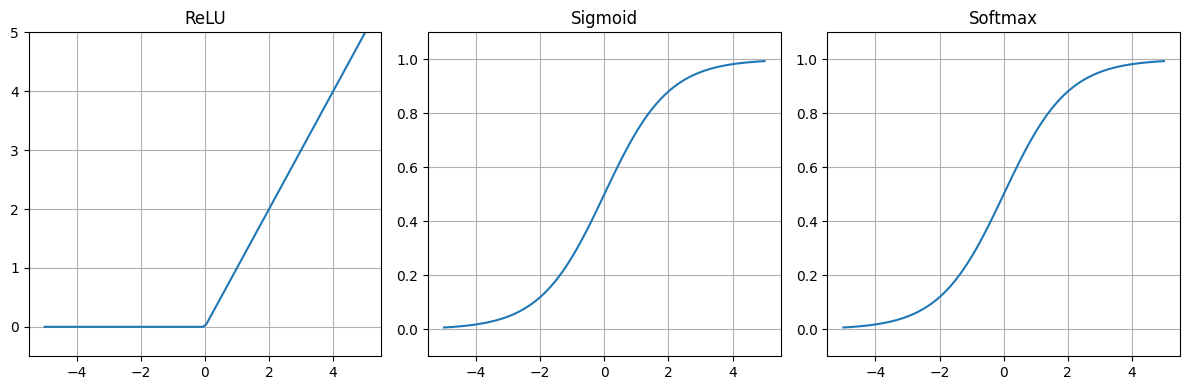

In [65]:
import numpy as np
import matplotlib.pyplot as plt

#activation functions
def relu(x): return np.maximum(0, x)
def sigmoid(x): return 1 / (1 + np.exp(-np.clip(x, -100, 100)))
def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum()

x = np.linspace(-5, 5, 100)
z = np.array([-2.0, -1.0, 0.0, 1.0, 2.0])

print("Sample inputs:", z)
print("ReLU output:", relu(z))
print("Sigmoid output:", sigmoid(z))
print("Softmax output:", softmax(z))

#plot activation functions
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.plot(x, relu(x))
plt.title('ReLU')
plt.grid(True)
plt.ylim(-0.5, 5)

plt.subplot(132)
plt.plot(x, sigmoid(x))
plt.title('Sigmoid')
plt.grid(True)
plt.ylim(-0.1, 1.1)

plt.subplot(133)
plt.plot(x, np.array([softmax(np.array([xi, 0])) for xi in x])[:, 0])
plt.title('Softmax')
plt.grid(True)
plt.ylim(-0.1, 1.1)

plt.tight_layout()
plt.show()


## Cost Function
The cost function measures how well the neural network's predictions match the true labels. It guides the learning process by quantifying the "error" between predictions and the actual outputs.

* For regression tasks, a common cost function is **Mean Squared Error** (MSE): $$J = \frac{1}{2} \sum_{n=1}^{N} \sum_{k=1}^{K}(\hat{y}_k^{(n)}-{y}_k^{(n)})^2$$
* For classification tasks, particularly binary classification, **cross-entropy loss** is often used: $$J=-\sum_{n=1}^{N}(y^{(n)}\ln \hat{y}^{(n)}+(1-y^{(n)}) \ln (1- \hat{y}^{(n)}))$$

In [66]:
import numpy as np

#cost functions
def mse(y_true, y_pred): return np.mean((y_true - y_pred) ** 2)
def binary_cross_entropy(y_true, y_pred):
    eps = 1e-15
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

#predict
y_true = np.array([1, 0, 1, 0, 1])
random_pred = np.random.random(5)

print("Predictions:", random_pred)
print("MSE:", mse(y_true, random_pred))
print("Binary Cross-Entropy:", binary_cross_entropy(y_true, random_pred))


Predictions: [0.66449123 0.95896162 0.13599269 0.48515963 0.09823818]
MSE: 0.5654472788212281
Binary Cross-Entropy: 1.716278789678332


## Backpropagation
**Backpropagation** is a process to compute the gradient of the cost function with respect to each weight, helping to minimize the cost function by adjusting the weights and biases.

**Backpropagation** calculates how changing each weight and bias affects the cost function. It does this layer by layer from the output back to the input.

For each layer, we calculate the "error" (delta) at each node, which depends on the derivative of the activation function and the error from the previous layer.

## Backpropagation Algorithm
The **backpropagation algorithm** is the systematic application of the backpropagation process over multiple iterations (epochs). During each epoch, it uses gradient descent to adjust the weights and biases to minimize the cost function.

1. Initialize weights and biases randomly.
2. For each training input, calculate the network output and cost.
3. Compute gradients of the cost with respect to weights and biases, update them using stochastic gradient descent, and repeat until reaching desired accuracy.

In [67]:
import numpy as np

def forward(x, W1, b1, W2, b2):
    z1 = np.dot(x, W1) + b1
    a1 = np.maximum(0, z1)  # ReLU

    z2 = np.dot(a1, W2) + b2
    a2 = 1 / (1 + np.exp(-z2))  # sigmoid

    return a2, (z1, a1, z2, a2)

def backward(x, y, W1, b1, W2, b2, cache, learning_rate=0.1):
    z1, a1, z2, a2 = cache
    m = x.shape[0]

    #output layer gradients
    dz2 = a2 - y
    dW2 = np.dot(a1.T, dz2) / m
    db2 = np.mean(dz2, axis=0)

    #hidden layer gradients
    da1 = np.dot(dz2, W2.T)
    dz1 = da1 * (z1 > 0)
    dW1 = np.dot(x.T, dz1) / m
    db1 = np.mean(dz1, axis=0)

    #update weights
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    return W1, b1, W2, b2

X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])

input_size, hidden_size, output_size = 2, 4, 1
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

#train network
for epoch in range(10000):
    #forward pass
    pred, cache = forward(X, W1, b1, W2, b2)

    #backward pass
    W1, b1, W2, b2 = backward(X, y, W1, b1, W2, b2, cache)

    if epoch % 1000 == 0:
        loss = np.mean((pred - y) ** 2)
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

#predictions
final_pred = forward(X, W1, b1, W2, b2)[0]
print("\nFinal predictions:")
for x_i, y_i, p_i in zip(X, y, final_pred):
    print(f"Input: {x_i}, True: {y_i[0]}, Predicted: {p_i[0]:.4f}")


Epoch 0, Loss: 0.2500
Epoch 1000, Loss: 0.1668
Epoch 2000, Loss: 0.0027
Epoch 3000, Loss: 0.0004
Epoch 4000, Loss: 0.0001
Epoch 5000, Loss: 0.0001
Epoch 6000, Loss: 0.0000
Epoch 7000, Loss: 0.0000
Epoch 8000, Loss: 0.0000
Epoch 9000, Loss: 0.0000

Final predictions:
Input: [0 0], True: 0, Predicted: 0.0063
Input: [0 1], True: 1, Predicted: 0.9990
Input: [1 0], True: 1, Predicted: 0.9990
Input: [1 1], True: 0, Predicted: 0.0007
